In [29]:
import pandas as pd

# Read the CSV files into a pandas DataFrame
train_df = pd.read_csv('train.csv')
validation_df = pd.read_csv('valid.csv')
test_df = pd.read_csv('X_test.csv')
df_Li=[train_df,validation_df,test_df]

In [30]:
# Print the shape of the data in train_df
print("Shape of train_df:", train_df.shape)

# Calculate the missing values percentage
missing_values_percentage = train_df.isnull().mean() * 100

# Print the missing values percentage
print("Missing values percentage:")
print(missing_values_percentage)


Shape of train_df: (517788, 145)
Missing values percentage:
id                       100.000000
member_id                100.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
                            ...    
settlement_date           96.280331
settlement_amount         96.280331
settlement_percentage     96.280331
settlement_term           96.280331
loan_status                0.000000
Length: 145, dtype: float64


In [31]:
# Find the columns with empty cells
empty_columns = train_df.columns[train_df.isnull().mean()>0.5].tolist()
# print(empty_columns)

for df in df_Li:
    df.drop(empty_columns, axis=1, inplace=True)

# Find the columns with a single unique value
single_unique_columns = train_df.columns[train_df.nunique() == 1].tolist()
for df in df_Li:
    df.drop(single_unique_columns, axis=1, inplace=True)    

print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(517788, 82)
(172596, 82)
(172596, 81)


In [32]:
cols = train_df.select_dtypes(include='object').columns
for column in cols:
    unique_values = train_df[column].nunique()
    print(f"Number of unique values in {column}: {unique_values}")

Number of unique values in term: 2
Number of unique values in grade: 7
Number of unique values in sub_grade: 35
Number of unique values in emp_title: 175168
Number of unique values in emp_length: 11
Number of unique values in home_ownership: 6
Number of unique values in verification_status: 3
Number of unique values in issue_d: 138
Number of unique values in purpose: 14
Number of unique values in title: 27117
Number of unique values in zip_code: 909
Number of unique values in addr_state: 51
Number of unique values in earliest_cr_line: 709
Number of unique values in initial_list_status: 2
Number of unique values in last_pymnt_d: 133
Number of unique values in last_credit_pull_d: 132
Number of unique values in application_type: 2
Number of unique values in disbursement_method: 2
Number of unique values in debt_settlement_flag: 2


In [33]:
for df in df_Li:
    df.drop(['emp_title','title','zip_code','addr_state'], axis=1, inplace=True)

# all the grade data can be obtained from the subgrade
for df in df_Li:
    df.drop(['grade'], axis=1, inplace=True)

In [34]:
# Test Code

print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(517788, 77)
(172596, 77)
(172596, 76)


In [35]:
null_counts = train_df.isnull().sum().sort_values(ascending=False)
null_counts = null_counts[null_counts > 0]
print(null_counts)

mths_since_recent_inq         64883
num_tl_120dpd_2m              45690
mo_sin_old_il_acct            40678
emp_length                    31300
pct_tl_nvr_dlq                25950
avg_cur_bal                   25887
num_actv_rev_tl               25879
num_rev_accts                 25879
num_il_tl                     25879
num_bc_tl                     25879
total_rev_hi_lim              25879
num_actv_bc_tl                25879
num_rev_tl_bal_gt_0           25879
mo_sin_rcnt_tl                25879
tot_coll_amt                  25879
tot_cur_bal                   25879
mo_sin_rcnt_rev_tl_op         25879
num_accts_ever_120_pd         25879
num_op_rev_tl                 25879
mo_sin_old_rev_tl_op          25879
tot_hi_cred_lim               25879
num_tl_30dpd                  25879
num_tl_90g_dpd_24m            25879
num_tl_op_past_12m            25879
total_il_high_credit_limit    25879
bc_util                       23581
percent_bc_gt_75              23464
bc_open_to_buy              

In [36]:
# DO NOT DELETE ROWS OF VALID AND TEST DATA SETS
train_df.dropna(subset=['num_actv_rev_tl','emp_length'], inplace=True)

In [37]:
null_counts = train_df.isnull().sum().sort_values(ascending=False)
null_counts = null_counts[null_counts > 0]
print(null_counts)

mths_since_recent_inq    42464
num_tl_120dpd_2m         18391
mo_sin_old_il_acct       12607
bc_util                   5018
percent_bc_gt_75          4900
bc_open_to_buy            4761
mths_since_recent_bc      4461
last_pymnt_d              1162
revol_util                 267
pct_tl_nvr_dlq              64
last_credit_pull_d          18
avg_cur_bal                  8
dti                          5
dtype: int64


In [38]:
# print(train_df.shape)
# print(validation_df.shape)
# print(test_df.shape)

In [39]:
null_columns = train_df.columns[train_df.isnull().any()].tolist()
# print(null_columns)
train_df[null_columns].hist(figsize=(300, 100), bins=1000)


array([[<Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'revol_util'}>,
        <Axes: title={'center': 'avg_cur_bal'}>],
       [<Axes: title={'center': 'bc_open_to_buy'}>,
        <Axes: title={'center': 'bc_util'}>,
        <Axes: title={'center': 'mo_sin_old_il_acct'}>],
       [<Axes: title={'center': 'mths_since_recent_bc'}>,
        <Axes: title={'center': 'mths_since_recent_inq'}>,
        <Axes: title={'center': 'num_tl_120dpd_2m'}>],
       [<Axes: title={'center': 'pct_tl_nvr_dlq'}>,
        <Axes: title={'center': 'percent_bc_gt_75'}>, <Axes: >]],
      dtype=object)

In [40]:
for df in df_Li:
    null_counts = df.isnull().sum().sort_values(ascending=False)
    null_counts = null_counts[null_counts > 0]
    print(null_counts)

mths_since_recent_inq    42464
num_tl_120dpd_2m         18391
mo_sin_old_il_acct       12607
bc_util                   5018
percent_bc_gt_75          4900
bc_open_to_buy            4761
mths_since_recent_bc      4461
last_pymnt_d              1162
revol_util                 267
pct_tl_nvr_dlq              64
last_credit_pull_d          18
avg_cur_bal                  8
dti                          5
dtype: int64
mths_since_recent_inq         21744
num_tl_120dpd_2m              15381
mo_sin_old_il_acct            13525
emp_length                    10569
pct_tl_nvr_dlq                 8704
avg_cur_bal                    8691
mo_sin_old_rev_tl_op           8689
mo_sin_rcnt_rev_tl_op          8689
mo_sin_rcnt_tl                 8688
tot_coll_amt                   8688
num_rev_tl_bal_gt_0            8688
num_actv_bc_tl                 8688
num_actv_rev_tl                8688
tot_cur_bal                    8688
num_bc_tl                      8688
num_il_tl                      8688
num_rev_

In [41]:
# Impute missing values for numeric variables using mean
numeric_cols = ['dti', 'revol_util', 'mo_sin_old_il_acct']
mean_values = train_df[numeric_cols].mean()
for df in df_Li:
    df[numeric_cols] = df[numeric_cols].fillna(mean_values)
    

# Impute missing values for skewed numeric variables using median
skewed_cols = ['avg_cur_bal','bc_open_to_buy', 'bc_util', 'mths_since_recent_bc', 
               'mths_since_recent_inq','num_tl_120dpd_2m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75']  
median_values = train_df[skewed_cols].median()
# print(median_values)
for df in df_Li:
    df[skewed_cols] = df[skewed_cols].fillna(median_values)

# Impute missing values for categorical variables using mode
categorical_cols = ['last_pymnt_d', 'last_credit_pull_d']
mode_values = train_df[categorical_cols].mode().iloc[0]
# print(mode_values)
for df in df_Li:
    df[categorical_cols] = df[categorical_cols].fillna(mode_values)

In [42]:
for df in df_Li:
    null_counts = df.isnull().sum().sort_values(ascending=False)
    null_counts = null_counts[null_counts > 0]
    print(null_counts)

Series([], dtype: int64)
emp_length                    10569
mo_sin_old_rev_tl_op           8689
mo_sin_rcnt_rev_tl_op          8689
total_rev_hi_lim               8688
num_tl_30dpd                   8688
tot_cur_bal                    8688
tot_coll_amt                   8688
mo_sin_rcnt_tl                 8688
num_accts_ever_120_pd          8688
num_actv_bc_tl                 8688
num_actv_rev_tl                8688
num_bc_tl                      8688
num_il_tl                      8688
num_rev_accts                  8688
num_rev_tl_bal_gt_0            8688
num_op_rev_tl                  8688
num_tl_90g_dpd_24m             8688
num_tl_op_past_12m             8688
total_il_high_credit_limit     8688
tot_hi_cred_lim                8688
num_sats                       7143
num_bc_sats                    7143
acc_open_past_24mths           6061
total_bc_limit                 6061
total_bal_ex_mort              6061
mort_acc                       6061
pub_rec_bankruptcies             95
tax

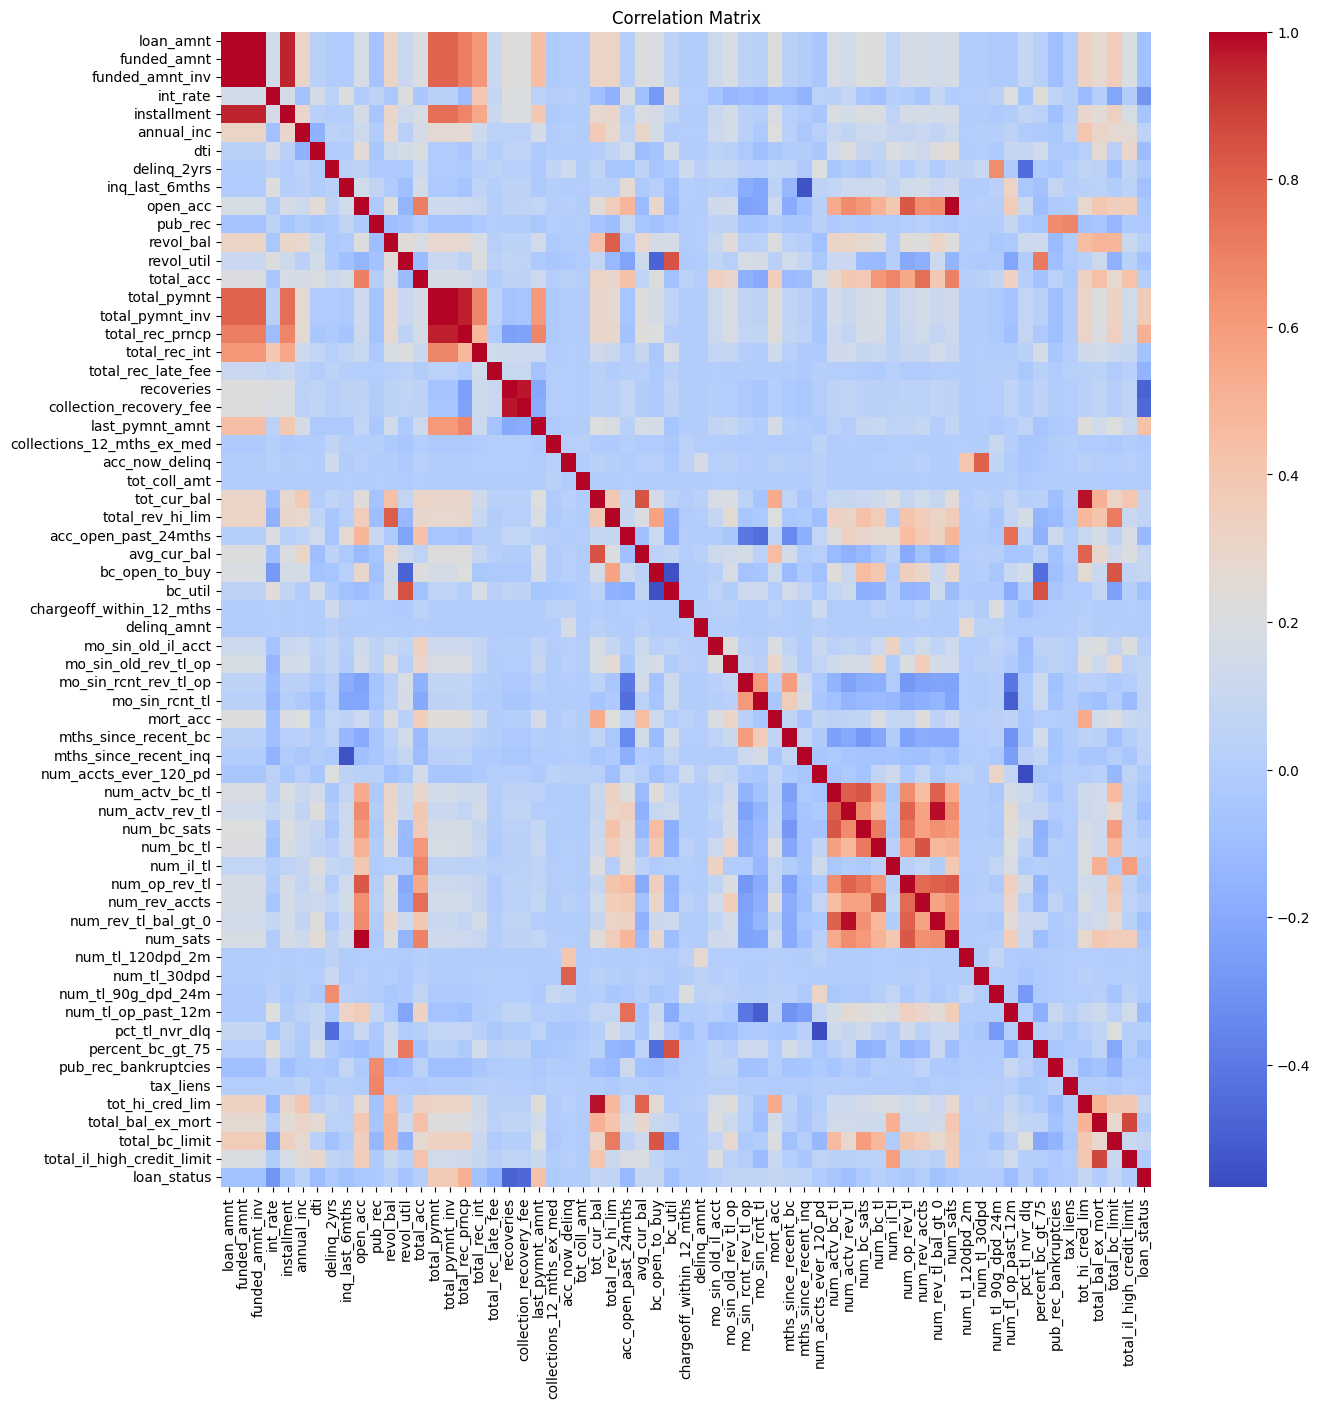

In [43]:
import seaborn as sns
numeric_cols = train_df.select_dtypes(include='number').columns
correlation_matrix = train_df[numeric_cols].corr()
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [44]:
for df in df_Li:
    df.drop(['funded_amnt', 'funded_amnt_inv', 'installment','num_sats','tot_hi_cred_lim','num_actv_rev_tl','total_il_high_credit_limit','collection_recovery_fee','total_pymnt_inv','total_rec_prncp'], axis=1, inplace=True)


#Before Imputing the remaining null values, encode and minimize the number of columns

In [45]:
categorical_cols = train_df.select_dtypes(include='object').columns
for column in categorical_cols:
    unique_values = train_df[column].nunique()
    print(f"Number of unique values in {column}: {unique_values}")


Number of unique values in term: 2
Number of unique values in sub_grade: 35
Number of unique values in emp_length: 11
Number of unique values in home_ownership: 6
Number of unique values in verification_status: 3
Number of unique values in issue_d: 77
Number of unique values in purpose: 13
Number of unique values in earliest_cr_line: 686
Number of unique values in initial_list_status: 2
Number of unique values in last_pymnt_d: 78
Number of unique values in last_credit_pull_d: 78
Number of unique values in application_type: 2
Number of unique values in disbursement_method: 2
Number of unique values in debt_settlement_flag: 2


In [46]:
# Convert date related columns to months up to February 2024
date_cols=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
for col in date_cols:
    # no imputed values in valid_df
    train_df[col] = pd.to_datetime(train_df[col], format='mixed')
    train_df[col] = (2024*12 + 2) - (train_df[col].dt.year*12 + train_df[col].dt.month)
    validation_df[col] = pd.to_datetime(validation_df[col], format='mixed')
    validation_df[col] = (2024*12 + 2) - (validation_df[col].dt.year*12 + validation_df[col].dt.month)
    test_df[col] = pd.to_datetime(test_df[col], format='mixed')
    test_df[col] = (2024*12 + 2) - (test_df[col].dt.year*12 + test_df[col].dt.month)

In [47]:
term_dict = {' 36 months': 36, ' 60 months': 60}
train_df['term'] = train_df['term'].map(term_dict)
validation_df['term'] = validation_df['term'].map(term_dict)
test_df['term'] = test_df['term'].map(term_dict)

# application type
app_type_dict = {'Individual': 0, 'Joint App': 1}
train_df['application_type'] = train_df['application_type'].map(app_type_dict)
validation_df['application_type'] = validation_df['application_type'].map(app_type_dict)
test_df['application_type'] = test_df['application_type'].map(app_type_dict)

# disbursment method
disb_method_dict = {'Cash': 0, 'DirectPay': 1}
train_df['disbursement_method'] = train_df['disbursement_method'].map(disb_method_dict)
validation_df['disbursement_method'] = validation_df['disbursement_method'].map(disb_method_dict)
test_df['disbursement_method'] = test_df['disbursement_method'].map(disb_method_dict)

# debt-settlemet falg
deb_settle_dict = {'N': 0, 'Y': 1}
train_df['debt_settlement_flag'] = train_df['debt_settlement_flag'].map(deb_settle_dict)
validation_df['debt_settlement_flag'] = validation_df['debt_settlement_flag'].map(deb_settle_dict)
test_df['debt_settlement_flag'] = test_df['debt_settlement_flag'].map(deb_settle_dict)

# initial list status
init_list_dict = {'w': 0, 'f': 1}
train_df['initial_list_status'] = train_df['initial_list_status'].map(init_list_dict)
validation_df['initial_list_status'] = validation_df['initial_list_status'].map(init_list_dict)
test_df['initial_list_status'] = test_df['initial_list_status'].map(init_list_dict)

In [48]:
from sklearn.preprocessing import OrdinalEncoder

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the 'sub_grade' column in the train_df DataFrame
train_df['sub_grade'] = encoder.fit_transform(train_df[['sub_grade']])
validation_df['sub_grade'] = encoder.fit_transform(validation_df[['sub_grade']])
test_df['sub_grade'] = encoder.fit_transform(test_df[['sub_grade']])

# print(train_df['sub_grade'].head())


In [49]:
emp_length_dict = {'1 year': 1,'4 years': 4,'< 1 year': 0,'5 years': 5,'10+ years': 10,'3 years': 3,'6 years': 6,'2 years': 2,'9 years': 9,'7 years': 7,'8 years': 8,'n/a': 0}
train_df['emp_length'] = train_df['emp_length'].map(emp_length_dict)
validation_df['emp_length'] = validation_df['emp_length'].map(emp_length_dict)
test_df['emp_length'] = test_df['emp_length'].map(emp_length_dict)

# print(train_df['emp_length'].head())


In [50]:
train_df = pd.get_dummies(train_df, columns=['home_ownership', 'verification_status'])
validation_df = pd.get_dummies(validation_df, columns=['home_ownership', 'verification_status'])
test_df = pd.get_dummies(test_df, columns=['home_ownership', 'verification_status'])

In [51]:
train_df['purpose'] = train_df['purpose'].where(train_df['purpose'].isin(['debt_consolidation', 'credit_card', 'home_improvement']), 'other')
validation_df['purpose'] = validation_df['purpose'].where(validation_df['purpose'].isin(['debt_consolidation', 'credit_card', 'home_improvement']), 'other')
test_df['purpose'] = test_df['purpose'].where(test_df['purpose'].isin(['debt_consolidation', 'credit_card', 'home_improvement']), 'other')

train_df = pd.get_dummies(train_df, columns=['purpose'])
validation_df = pd.get_dummies(validation_df, columns=['purpose'])
test_df = pd.get_dummies(test_df, columns=['purpose'])

In [52]:
train_df.shape

(461436, 77)

In [53]:
null_counts = train_df.isnull().sum().sort_values(ascending=False)
print(null_counts)


loan_amnt                     0
num_rev_accts                 0
percent_bc_gt_75              0
pct_tl_nvr_dlq                0
num_tl_op_past_12m            0
                             ..
application_type              0
collections_12_mths_ex_med    0
last_credit_pull_d            0
last_pymnt_amnt               0
purpose_other                 0
Length: 77, dtype: int64


In [54]:
from sklearn.feature_selection import mutual_info_classif

# Select the target variable
target = train_df['loan_status']

# Select the features to calculate mutual information gain
features = train_df.drop('loan_status', axis=1)

# Calculate the mutual information gain
mutual_info = mutual_info_classif(features, target)




# Print the mutual information gain for each feature
for feature, score in zip(features.columns, mutual_info):
    print(f"Mutual Information Gain for {feature}: {score}")


Mutual Information Gain for loan_amnt: 0.010980764791222786
Mutual Information Gain for term: 0.051248064683942385
Mutual Information Gain for int_rate: 0.052399755698203654
Mutual Information Gain for sub_grade: 0.053330616566144906
Mutual Information Gain for emp_length: 0.01529358830825922
Mutual Information Gain for annual_inc: 0.003117901162017045
Mutual Information Gain for issue_d: 0.005627273951334333
Mutual Information Gain for dti: 0.008180177359032426
Mutual Information Gain for delinq_2yrs: 0.0013191512296550911
Mutual Information Gain for earliest_cr_line: 0.002193513701912675
Mutual Information Gain for inq_last_6mths: 0.011116196723772509
Mutual Information Gain for open_acc: 0.0023567504763486458
Mutual Information Gain for pub_rec: 0.0018101607398308683
Mutual Information Gain for revol_bal: 0.0
Mutual Information Gain for revol_util: 0.0028648579890917514
Mutual Information Gain for total_acc: 0.0012955520077044813
Mutual Information Gain for initial_list_status: 0.02

In [55]:
sorted_scores = sorted(zip(features.columns, mutual_info), key=lambda x: x[1], reverse=True) 
for feature, score in sorted_scores: 
    print(f"Mutual Information Gain for {feature}: {score}")

Mutual Information Gain for last_pymnt_amnt: 0.39822924288742856
Mutual Information Gain for recoveries: 0.31416670906525734
Mutual Information Gain for total_pymnt: 0.11808046104586989
Mutual Information Gain for last_credit_pull_d: 0.0831473439862993
Mutual Information Gain for sub_grade: 0.053330616566144906
Mutual Information Gain for int_rate: 0.052399755698203654
Mutual Information Gain for purpose_debt_consolidation: 0.052379482286315504
Mutual Information Gain for term: 0.051248064683942385
Mutual Information Gain for home_ownership_MORTGAGE: 0.04830821990002088
Mutual Information Gain for debt_settlement_flag: 0.04797972664310368
Mutual Information Gain for total_rec_int: 0.030872902528720658
Mutual Information Gain for home_ownership_RENT: 0.030683864406525485
Mutual Information Gain for verification_status_Source Verified: 0.029852005239577428
Mutual Information Gain for total_rec_late_fee: 0.02643481844310691
Mutual Information Gain for initial_list_status: 0.02581064256456

In [56]:
print(train_df.shape)
print(train_df.columns)

(461436, 77)
Index(['loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_length',
       'annual_inc', 'issue_d', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_tl_120d

In [57]:
top_features = [feature for feature, score in sorted_scores[:20]]
Y_train = train_df['loan_status']
train_df = train_df[top_features]

Y_valid = validation_df['loan_status']
validation_df = validation_df[top_features]

test_df = test_df[top_features]

train_df


,last_pymnt_amnt,recoveries,total_pymnt,last_credit_pull_d,sub_grade,int_rate,purpose_debt_consolidation,term,home_ownership_MORTGAGE,debt_settlement_flag,total_rec_int,home_ownership_RENT,verification_status_Source Verified,total_rec_late_fee,initial_list_status,verification_status_Not Verified,last_pymnt_d,verification_status_Verified,pct_tl_nvr_dlq,emp_length
0,8611.87,0.00,15118.387808,62,3.0,7.35,True,36,True,0,1118.39,False,False,0.000000,1,True,62,False,100.0,1
2,2662.94,0.00,5455.927032,76,3.0,7.39,False,36,True,0,455.93,False,False,0.000000,1,True,76,False,100.0,4
4,4753.53,0.00,10952.605895,67,3.0,7.39,False,36,True,0,952.61,False,True,0.000000,0,False,74,False,97.0,0
5,172.01,1134.40,1474.400000,60,13.0,14.46,False,36,True,1,115.13,False,False,0.000000,0,False,93,True,67.0,5
6,2809.30,0.00,17146.308688,62,10.0,11.99,False,36,True,0,2746.31,False,False,0.000000,1,False,62,True,96.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517783,134.36,413.91,1637.630000,88,19.0,20.31,False,36,False,0,503.00,True,False,14.991083,1,False,118,True,88.0,3
517784,4040.19,0.00,9506.516869,60,12.0,13.99,True,36,True,0,1506.52,False,True,0.000000,1,False,60,False,86.2,4
517785,357.42,1860.08,4004.600000,88,17.0,18.25,True,60,True,0,1243.86,False,True,0.000000,1,False,114,False,100.0,10
517786,185.80,0.00,6699.304817,67,14.0,17.27,True,36,True,0,1499.30,False,False,0.000000,1,False,96,True,95.0,10


In [58]:
print([train_df.isnull().sum().sort_values(ascending=False)])
print([validation_df.isnull().sum().sort_values(ascending=False)])
print([test_df.isnull().sum().sort_values(ascending=False)])

[last_pymnt_amnt                        0
recoveries                             0
pct_tl_nvr_dlq                         0
verification_status_Verified           0
last_pymnt_d                           0
verification_status_Not Verified       0
initial_list_status                    0
total_rec_late_fee                     0
verification_status_Source Verified    0
home_ownership_RENT                    0
total_rec_int                          0
debt_settlement_flag                   0
home_ownership_MORTGAGE                0
term                                   0
purpose_debt_consolidation             0
int_rate                               0
sub_grade                              0
last_credit_pull_d                     0
total_pymnt                            0
emp_length                             0
dtype: int64]
[emp_length                             10569
recoveries                                 0
pct_tl_nvr_dlq                             0
verification_status_Verified 

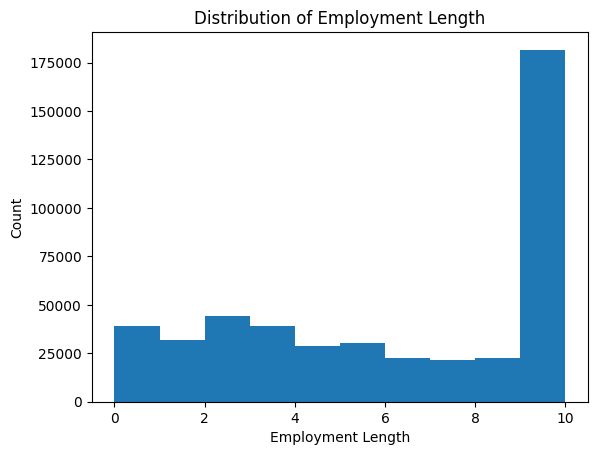

In [59]:
train_df['emp_length'].plot(kind='hist')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length')
plt.show()


In [60]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with the strategy as 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Impute the missing values of emp_length in the validation dataset
validation_df['emp_length'] = imputer.fit_transform(validation_df[['emp_length']])

# Impute the missing values of emp_length in the test dataset
test_df['emp_length'] = imputer.transform(test_df[['emp_length']])


In [61]:
print([train_df.isnull().sum().sort_values(ascending=False)])
print([validation_df.isnull().sum().sort_values(ascending=False)])
print([test_df.isnull().sum().sort_values(ascending=False)])
print(df.shape)

[last_pymnt_amnt                        0
recoveries                             0
pct_tl_nvr_dlq                         0
verification_status_Verified           0
last_pymnt_d                           0
verification_status_Not Verified       0
initial_list_status                    0
total_rec_late_fee                     0
verification_status_Source Verified    0
home_ownership_RENT                    0
total_rec_int                          0
debt_settlement_flag                   0
home_ownership_MORTGAGE                0
term                                   0
purpose_debt_consolidation             0
int_rate                               0
sub_grade                              0
last_credit_pull_d                     0
total_pymnt                            0
emp_length                             0
dtype: int64]
[last_pymnt_amnt                        0
recoveries                             0
pct_tl_nvr_dlq                         0
verification_status_Verified           0


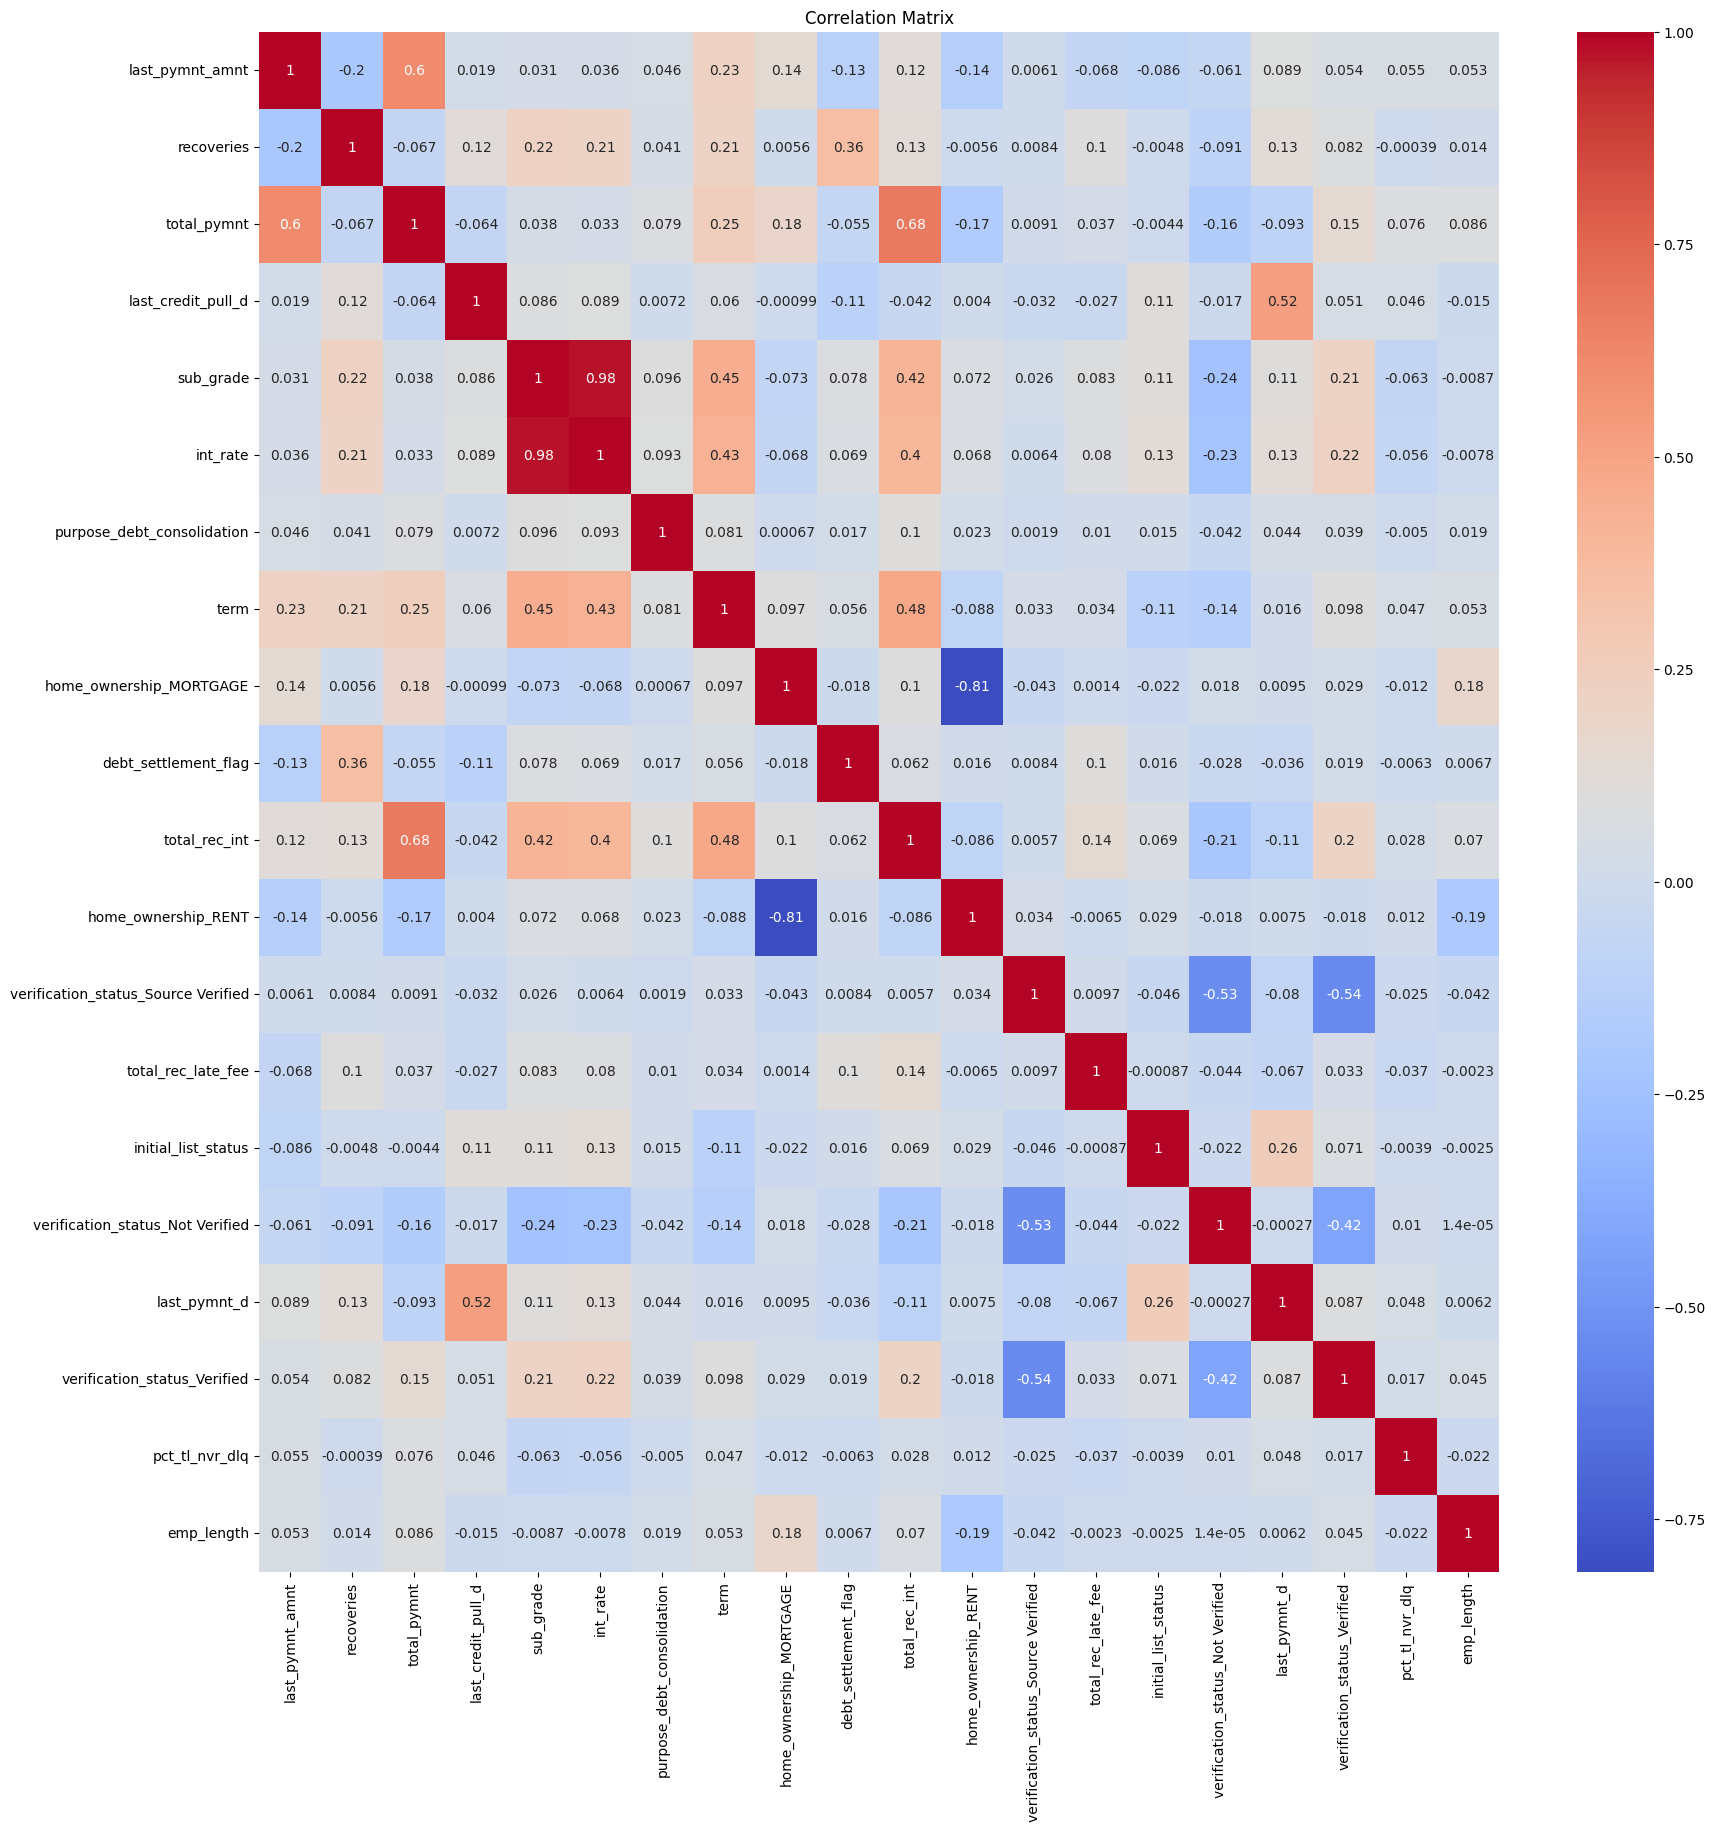

In [62]:
correlation_matrix = train_df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [63]:
train_df.drop('sub_grade', axis=1, inplace=True)
validation_df.drop('sub_grade', axis=1, inplace=True)
test_df.drop('sub_grade', axis=1, inplace=True)


In [64]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
model = XGBClassifier(objective='binary:logistic', n_estimators=1000,seed=123)

model.fit(train_df, Y_train)

scores = cross_val_score(model, train_df, Y_train, cv=10)

# Printing the mean of the cross validation scores with 95% confidence interval
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 1.00 (+/- 0.00)


In [65]:
from sklearn.metrics import accuracy_score

#Y_train_pred = model.predict(X_train)
Y_valid_pred = model.predict(validation_df)

predictions = [round(value) for value in Y_valid_pred]

#ccuracy_train = accuracy_score(Y_train, Y_train_pred)
accuracy_valid = accuracy_score(Y_valid, predictions)

#print(accuracy_train, accuracy_valid)
print("Accuracy is", accuracy_valid*100,"%")

Accuracy is 99.71667941319613 %


In [66]:
Y_test_pred = model.predict(test_df)

In [ ]:
final_result = pd.DataFrame(test_df)
final_result.insert(0, 'loan_status',Y_test_pred)

In [ ]:
final_result.to_csv('210647C.csv', index=False)